In [1]:
import pandas as pd
import numpy as np

In [2]:
# Set a seed for reproducibility
np.random.seed(42)


In [3]:
# Number of students
num_students = 100

In [4]:
# Generate data with potential issues
data = {
    'StudentID': range(1, num_students + 1),
    'Gender': np.random.choice(['Male', 'Female', np.nan, 'Other'], size=num_students),
    'Math_Score': np.random.randint(0, 101, size=num_students),
    'Science_Score': np.random.randint(0, 101, size=num_students),
    'English_Score': np.random.choice([np.random.randint(0, 101), np.nan, -5, 110], size=num_students),
    'Study_Hours': np.random.normal(5, 2, size=num_students),
    'Attendance_Rate': np.random.uniform(0.7, 1.05, size=num_students),
    'Extracurricular_Activities': np.random.choice(['Yes', 'No', np.nan, 'YES', 'no'], size=num_students),
    'Grade': np.random.choice(['A', 'B', 'C', 'D', 'F', np.nan], size=num_students)
}

In [5]:
df_academic = pd.DataFrame(data)

In [6]:
# Introduce some intentional inconsistencies
df_academic.loc[df_academic['Attendance_Rate'] > 1, 'Attendance_Rate'] = np.nan
df_academic['Study_Hours'] = df_academic['Study_Hours'].abs() # Ensure study hours are positive

print("Initial Academic Performance Dataset:\n", df_academic.head())

Initial Academic Performance Dataset:
    StudentID Gender  Math_Score  Science_Score  English_Score  Study_Hours  \
0          1    nan          62             41           -5.0     1.127248   
1          2  Other          17             44          110.0     3.305285   
2          3   Male          89             61            0.0     7.728867   
3          4    nan          43             56            0.0     7.344058   
4          5    nan          33              5            NaN     4.253762   

   Attendance_Rate Extracurricular_Activities Grade  
0         0.987149                        YES   nan  
1         0.928020                        Yes     A  
2         0.772340                        Yes     C  
3         0.795886                        Yes     F  
4         0.775106                         no     F  


In [7]:
# 1. Scan for Missing Values
print("\nMissing Values per Column:\n", df_academic.isnull().sum())


Missing Values per Column:
 StudentID                      0
Gender                         0
Math_Score                     0
Science_Score                  0
English_Score                 23
Study_Hours                    0
Attendance_Rate               15
Extracurricular_Activities     0
Grade                          0
dtype: int64


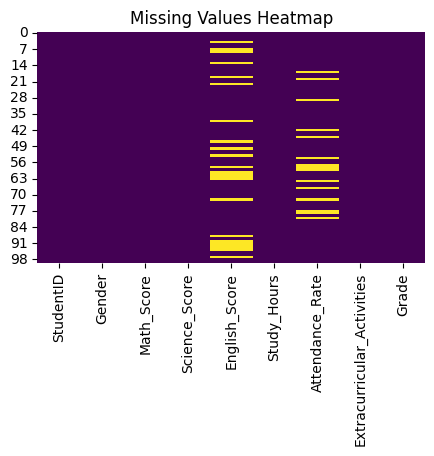

In [10]:

# Visualize missing values (optional, but helpful)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.heatmap(df_academic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Missing Values per Column:
 StudentID                      0
Gender                         0
Math_Score                     0
Science_Score                  0
English_Score                 23
Study_Hours                    0
Attendance_Rate               15
Extracurricular_Activities     0
Grade                          0
dtype: int64


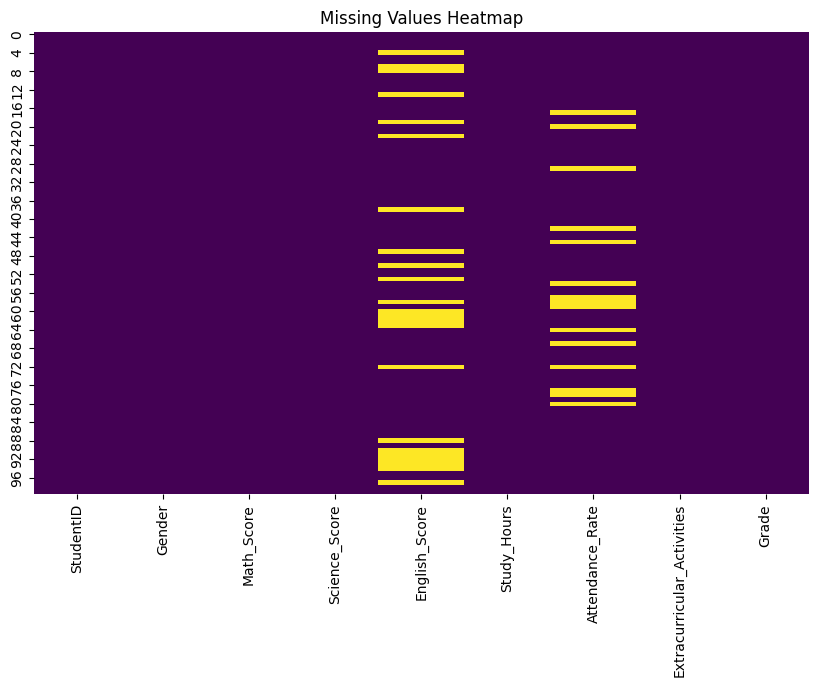


'Gender' missing values filled with mode:
 0

Numerical missing values filled with mean:
 Math_Score         0
Science_Score      0
English_Score      0
Study_Hours        0
Attendance_Rate    0
dtype: int64

Standardized 'Extracurricular_Activities' values:
 ['yes' 'no' 'nan']

'Grade' missing values filled with mode:
 0

Unique values in 'Gender': ['nan' 'Other' 'Male' 'Female']
Unique values in 'Extracurricular_Activities': ['yes' 'no' 'nan']
Unique values in 'Grade': ['nan' 'A' 'C' 'F' 'D' 'B']

DataFrame after handling missing values and inconsistencies (first 5 rows):
    StudentID Gender  Math_Score  Science_Score  English_Score  Study_Hours  \
0          1    nan          62             41      -5.000000     1.127248   
1          2  Other          17             44     110.000000     3.305285   
2          3   Male          89             61       0.000000     7.728867   
3          4    nan          43             56       0.000000     7.344058   
4          5    nan        

C:\Users\sagar\AppData\Local\Temp\ipykernel_20392\2028804247.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_academic['Gender'].fillna(df_academic['Gender'].mode()[0], inplace=True)
C:\Users\sagar\AppData\Local\Temp\ipykernel_20392\2028804247.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [11]:
# 1. Scan for Missing Values
print("\nMissing Values per Column:\n", df_academic.isnull().sum())

# Visualize missing values (optional, but helpful)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_academic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Handle Missing Values
# For 'Gender', fill with the mode
df_academic['Gender'].fillna(df_academic['Gender'].mode()[0], inplace=True)
print("\n'Gender' missing values filled with mode:\n", df_academic['Gender'].isnull().sum())

# For numerical scores, fill with the mean
for col in ['Math_Score', 'Science_Score', 'English_Score', 'Study_Hours', 'Attendance_Rate']:
    df_academic[col].fillna(df_academic[col].mean(), inplace=True)
print("\nNumerical missing values filled with mean:\n", df_academic[['Math_Score', 'Science_Score', 'English_Score', 'Study_Hours', 'Attendance_Rate']].isnull().sum())

# For 'Extracurricular_Activities', standardize the entries
df_academic['Extracurricular_Activities'] = df_academic['Extracurricular_Activities'].str.lower().str.strip()
df_academic['Extracurricular_Activities'].fillna('no', inplace=True) # Fill remaining NaNs after standardization
print("\nStandardized 'Extracurricular_Activities' values:\n", df_academic['Extracurricular_Activities'].unique())

# For 'Grade', fill with the mode
df_academic['Grade'].fillna(df_academic['Grade'].mode()[0], inplace=True)
print("\n'Grade' missing values filled with mode:\n", df_academic['Grade'].isnull().sum())

# 2. Scan for Inconsistencies
print("\nUnique values in 'Gender':", df_academic['Gender'].unique())
print("Unique values in 'Extracurricular_Activities':", df_academic['Extracurricular_Activities'].unique())
print("Unique values in 'Grade':", df_academic['Grade'].unique())

# Handle Inconsistencies (already done for 'Extracurricular_Activities')
# No obvious inconsistencies in 'Gender' or 'Grade' after handling missing values,
# but if there were (e.g., 'MALE', 'f'), we would apply similar standardization.

print("\nDataFrame after handling missing values and inconsistencies (first 5 rows):\n", df_academic.head())


Numeric Columns: Index(['StudentID', 'Math_Score', 'Science_Score', 'English_Score',
       'Study_Hours', 'Attendance_Rate'],
      dtype='object')


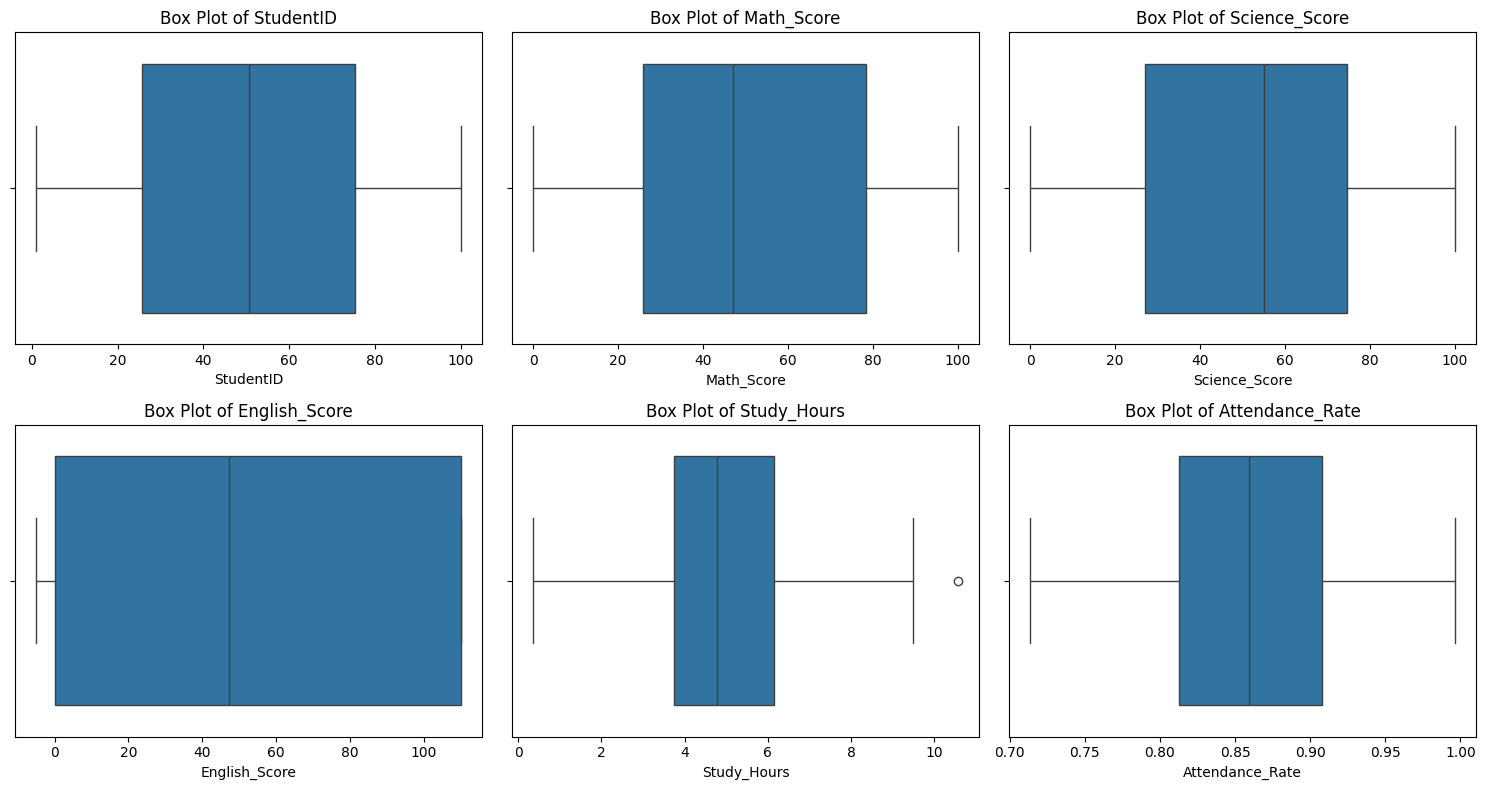


DataFrame shape before outlier removal: (100, 9)
DataFrame shape after outlier removal (IQR method): (99, 9)

DataFrame after capping/flooring outliers (first 5 rows):
    StudentID Gender  Math_Score  Science_Score  English_Score  Study_Hours  \
0        1.0    nan        62.0           41.0      -5.000000     1.127248   
1        2.0  Other        17.0           44.0     110.000000     3.305285   
2        3.0   Male        89.0           61.0       0.000000     7.728867   
3        4.0    nan        43.0           56.0       0.000000     7.344058   
4        5.0    nan        33.0            5.0      47.207792     4.253762   

   Attendance_Rate Extracurricular_Activities Grade  
0         0.987149                        yes   nan  
1         0.928020                        yes     A  
2         0.772340                        yes     C  
3         0.795886                        yes     F  
4         0.775106                         no     F  


In [12]:
# Identify Numeric Variables
numeric_cols = df_academic.select_dtypes(include=np.number).columns
print("\nNumeric Columns:", numeric_cols)

# Visualize outliers using box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_academic[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Handle Outliers using the IQR method (Interquartile Range)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

df_academic_no_outliers = df_academic.copy()
for col in numeric_cols:
    df_academic_no_outliers = remove_outliers_iqr(df_academic_no_outliers, col)

print("\nDataFrame shape before outlier removal:", df_academic.shape)
print("DataFrame shape after outlier removal (IQR method):", df_academic_no_outliers.shape)

# Alternatively, we could cap or floor the outliers instead of removing them
def cap_floor_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df_academic_capped = df_academic.copy()
for col in numeric_cols:
    df_academic_capped = cap_floor_outliers_iqr(df_academic_capped, col)

print("\nDataFrame after capping/flooring outliers (first 5 rows):\n", df_academic_capped.head())

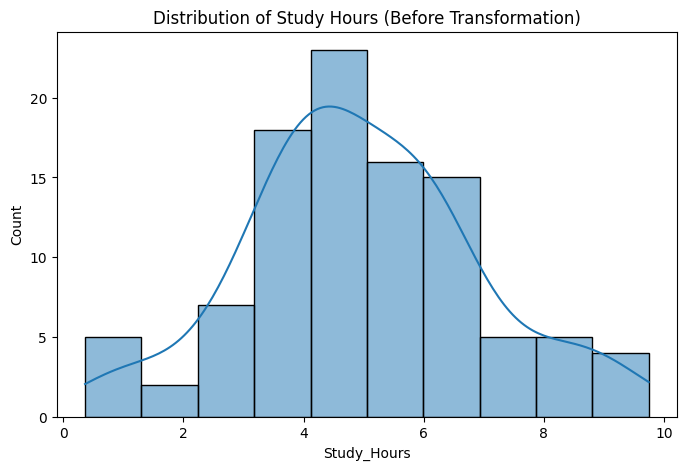

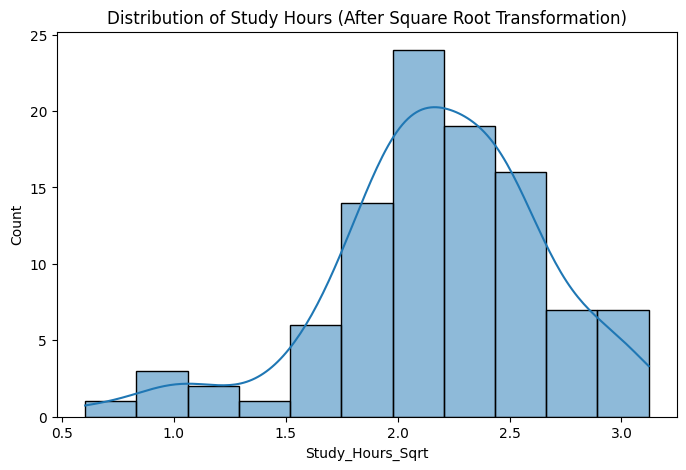


DataFrame with Transformed 'Study_Hours' (first 5 rows):
    Study_Hours  Study_Hours_Sqrt
0     1.127248          1.061719
1     3.305285          1.818044
2     7.728867          2.780084
3     7.344058          2.709992
4     4.253762          2.062465


In [13]:
# Visualize the distribution of 'Study_Hours' before transformation
plt.figure(figsize=(8, 5))
sns.histplot(df_academic_capped['Study_Hours'], kde=True)
plt.title('Distribution of Study Hours (Before Transformation)')
plt.show()

# Apply Square Root Transformation
df_academic_capped['Study_Hours_Sqrt'] = np.sqrt(df_academic_capped['Study_Hours'])

# Visualize the distribution of 'Study_Hours' after transformation
plt.figure(figsize=(8, 5))
sns.histplot(df_academic_capped['Study_Hours_Sqrt'], kde=True)
plt.title('Distribution of Study Hours (After Square Root Transformation)')
plt.show()

print("\nDataFrame with Transformed 'Study_Hours' (first 5 rows):\n", df_academic_capped[['Study_Hours', 'Study_Hours_Sqrt']].head())